# Data manipulation notes

# Indexing and slicing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [4]:
df.index

RangeIndex(start=0, stop=244, step=1)

make column as index

In [5]:
df_ind=df.set_index('sex')

removing an index

In [6]:
df_ind.reset_index()

,sex,total_bill,tip,smoker,day,time,size
0,Female,16.99,1.01,No,Sun,Dinner,2
1,Male,10.34,1.66,No,Sun,Dinner,3
2,Male,21.01,3.50,No,Sun,Dinner,3
3,Male,23.68,3.31,No,Sun,Dinner,2
4,Female,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,Male,29.03,5.92,No,Sat,Dinner,3
240,Female,27.18,2.00,Yes,Sat,Dinner,2
241,Male,22.67,2.00,Yes,Sat,Dinner,2
242,Male,17.82,1.75,No,Sat,Dinner,2


droping an index

In [7]:
df_ind.reset_index(drop=True)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# indexing makes subsetting simpler

In [8]:
df[df['sex'].isin(['Male'])]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


# index dont need to be unique

In [9]:
df_ind=df.set_index('sex')

# subsetting duplicated indexed value

In [10]:
df_ind.loc['Female']

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,16.99,1.01,No,Sun,Dinner,2
Female,24.59,3.61,No,Sun,Dinner,4
Female,35.26,5.00,No,Sun,Dinner,4
Female,14.83,3.02,No,Sun,Dinner,2
Female,10.33,1.67,No,Sun,Dinner,3
...,...,...,...,...,...,...
Female,10.09,2.00,Yes,Fri,Lunch,2
Female,22.12,2.88,Yes,Sat,Dinner,2
Female,35.83,4.67,No,Sat,Dinner,3


# Multi level index

In [11]:
df_ind2=df.set_index(['sex','smoker'])

# subsetting inner levels with a list of tuples

In [12]:
df_ind2.loc[[('Male','Yes'),('Female','Yes')]]

total_bill   tip  day    time  size
sex    smoker                                     
Male   Yes          38.01  3.00  Sat  Dinner     4
       Yes          11.24  1.76  Sat  Dinner     2
       Yes          20.29  3.21  Sat  Dinner     2
       Yes          13.81  2.00  Sat  Dinner     2
       Yes          11.02  1.98  Sat  Dinner     2
...                   ...   ...  ...     ...   ...
Female Yes          13.42  3.48  Fri   Lunch     2
       Yes          16.27  2.50  Fri   Lunch     2
       Yes          10.09  2.00  Fri   Lunch     2
       Yes          22.12  2.88  Sat  Dinner     2
       Yes          27.18  2.00  Sat  Dinner     2

[93 rows x 5 columns]

# sorting by index value

In [13]:
df_ind2.sort_index()

total_bill   tip   day    time  size
sex    smoker                                      
Male   Yes          38.01  3.00   Sat  Dinner     4
       Yes          11.24  1.76   Sat  Dinner     2
       Yes          20.29  3.21   Sat  Dinner     2
       Yes          13.81  2.00   Sat  Dinner     2
       Yes          11.02  1.98   Sat  Dinner     2
...                   ...   ...   ...     ...   ...
Female No           13.39  2.61   Sun  Dinner     2
       No           16.21  2.00   Sun  Dinner     3
       No           15.98  3.00   Fri   Lunch     3
       No           35.83  4.67   Sat  Dinner     3
       No           18.78  3.00  Thur  Dinner     2

[244 rows x 5 columns]

# controlling sort index

In [14]:
df_ind2.sort_index(level=['smoker','sex'],ascending=[True,False])

total_bill   tip  day    time  size
sex    smoker                                     
Female Yes           3.07  1.00  Sat  Dinner     1
       Yes          26.86  3.14  Sat  Dinner     2
       Yes          25.28  5.00  Sat  Dinner     2
       Yes           5.75  1.00  Fri  Dinner     2
       Yes          16.32  4.30  Fri  Dinner     2
...                   ...   ...  ...     ...   ...
Male   No           11.61  3.39  Sat  Dinner     2
       No           10.77  1.47  Sat  Dinner     2
       No           10.07  1.25  Sat  Dinner     2
       No           29.03  5.92  Sat  Dinner     3
       No           17.82  1.75  Sat  Dinner     2

[244 rows x 5 columns]

# slicing list

In [15]:
names=['deeeba','saad','ali','mariam','azka','bilal']

In [16]:
names[2:5]

['ali', 'mariam', 'azka']

In [17]:
names[:]

['deeeba', 'saad', 'ali', 'mariam', 'azka', 'bilal']


# sort the index before u slice

In [18]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [19]:
df1=df.set_index(['sex','smoker']).sort_index()

In [20]:
df1.head(3)

total_bill   tip  day    time  size
sex  smoker                                     
Male Yes          38.01  3.00  Sat  Dinner     4
     Yes          11.24  1.76  Sat  Dinner     2
     Yes          20.29  3.21  Sat  Dinner     2

In [21]:
df.loc['Yes':'No']

,total_bill,tip,sex,smoker,day,time,size


In [22]:
#column slicing

In [23]:
df.loc[1:5,'sex':'day']

,sex,smoker,day
1,Male,No,Sun
2,Male,No,Sun
3,Male,No,Sun
4,Female,No,Sun
5,Male,No,Sun


# slice twice

In [24]:
df_ind2.loc[('Female','Yes'),'total_bill':'day']

/home/zebraking/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


total_bill   tip   day
sex    smoker                        
Female Yes           3.07  1.00   Sat
       Yes          26.86  3.14   Sat
       Yes          25.28  5.00   Sat
       Yes           5.75  1.00   Fri
       Yes          16.32  4.30   Fri
       Yes          11.35  2.50   Fri
       Yes          15.38  3.00   Fri
       Yes          44.30  2.50   Sat
       Yes          22.42  3.48   Sat
       Yes          14.31  4.00   Sat
       Yes          17.51  3.00   Sun
       Yes          10.59  1.61   Sat
       Yes          10.63  2.00   Sat
       Yes           9.60  4.00   Sun
       Yes          20.90  3.50   Sun
       Yes          18.15  3.50   Sun
       Yes          19.81  4.19  Thur
       Yes          43.11  5.00  Thur
       Yes          13.00  2.00  Thur
       Yes          12.74  2.01  Thur
       Yes          13.00  2.00  Thur
       Yes          16.40  2.50  Thur
       Yes          16.47  3.23  Thur
       Yes          12.76  2.23   Sat
       Yes          13.27  2.50   Sat
       Yes          28.17  6.50   Sat
       Yes          12.90  1.10   Sat
       Yes          30.14  3.09   Sat
       Yes          13.42  3.48   Fri
       Yes          16.27  2.50   Fri
       Yes          10.09  2.00   Fri
       Yes          22.12  2.88   Sat
       Yes          27.18  2.00   Sat

# subsetting by rows/columns numbers

In [25]:
df.iloc[1:3,2:4]

,sex,smoker
1,Male,No
2,Male,No


In [26]:
df.mean(axis=0)

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [27]:
# mean and median

In [28]:
df['tip'].min()

1.0

In [29]:
df['tip'].mean()

2.9982786885245902

In [30]:
# the agg method

In [31]:
def pct30(column):
    return column.quantile(0.3)

In [32]:
print(df['tip'].agg(pct30))
print(df['tip'].sum())

2.0
731.5799999999999


In [33]:
def sum(column):
    return column.sum()

In [34]:
df[['tip','total_bill']].agg(sum)

tip            731.58
total_bill    4827.77
dtype: float64

In [35]:
# dropping duplicates names

In [36]:
x=df.drop_duplicates(subset='sex')

In [37]:
#droping duplicate pairs
y=df.drop_duplicates(subset=['sex','day'])

In [38]:
# Propotions

In [39]:
df['tip'].value_counts(normalize=True)

2.00    0.135246
3.00    0.094262
4.00    0.049180
5.00    0.040984
2.50    0.040984
          ...   
2.83    0.004098
1.58    0.004098
3.71    0.004098
3.35    0.004098
2.18    0.004098
Name: tip, Length: 123, dtype: float64

In [40]:
df[df['sex']=='Male']['tip'].sum()

485.07

In [41]:
df[df['sex']=='Female']['tip'].sum()

246.50999999999996

In [42]:
# groupby

In [43]:
df.groupby('sex')['total_bill'].sum()

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64

In [44]:
df.groupby('sex')['smoker']

In [45]:
df.groupby('sex')['tip'].agg([min,max,sum])

,min,max,sum
sex,,,
Male,1.0,10.0,485.07
Female,1.0,6.5,246.51


In [46]:
df.groupby(['sex','smoker'])['total_bill'].sum()

sex     smoker
Male    Yes       1337.07
        No        1919.75
Female  Yes        593.27
        No         977.68
Name: total_bill, dtype: float64

In [47]:
#many groups many summaries

In [48]:
df.groupby(['sex','smoker'])[['total_bill','tip']].agg([min,max,sum])

total_bill                   tip              
                     min    max      sum   min   max     sum
sex    smoker                                               
Male   Yes          7.25  50.81  1337.07  1.00  10.0  183.07
       No           7.51  48.33  1919.75  1.25   9.0  302.00
Female Yes          3.07  44.30   593.27  1.00   6.5   96.74
       No           7.25  35.83   977.68  1.00   5.2  149.77

In [49]:
# groupby with pivot tables

In [50]:
df.pivot_table(values='total_bill',index='day',aggfunc=np.sum)

,total_bill
day,
Thur,1096.33
Fri,325.88
Sat,1778.40
Sun,1627.16


In [51]:
#multipl statistic

In [52]:
df.pivot_table(values='total_bill',index='sex',aggfunc=[np.mean,np.median])

,mean,median
,total_bill,total_bill
sex,,
Male,20.744076,18.35
Female,18.056897,16.40


In [53]:
# pivot with 2 variables

In [54]:
df.pivot_table(values='total_bill',index='sex',columns='day',aggfunc=[np.mean,np.median],margins=True)

mean                                              median          \
day          Thur        Fri        Sat        Sun        All    Thur     Fri   
sex                                                                             
Male    18.714667  19.857000  20.802542  21.887241  20.744076  16.975  17.215   
Female  16.715312  14.145556  19.680357  19.872222  18.056897  13.785  15.380   
All     17.682742  17.151579  20.441379  21.410000  19.785943  16.200  15.380   

                               
day       Sat     Sun     All  
sex                            
Male    18.24  20.725  18.350  
Female  18.36  17.410  16.400  
All     18.24  19.630  17.795

# Chap 3:
               Explicit indexing
               

In [55]:
# columns and index

In [56]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [57]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [58]:
# setting a columns as index

In [59]:
df1=df.set_index('sex')

In [60]:
# removing an index

In [61]:
df1.reset_index()

,sex,total_bill,tip,smoker,day,time,size
0,Female,16.99,1.01,No,Sun,Dinner,2
1,Male,10.34,1.66,No,Sun,Dinner,3
2,Male,21.01,3.50,No,Sun,Dinner,3
3,Male,23.68,3.31,No,Sun,Dinner,2
4,Female,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,Male,29.03,5.92,No,Sat,Dinner,3
240,Female,27.18,2.00,Yes,Sat,Dinner,2
241,Male,22.67,2.00,Yes,Sat,Dinner,2
242,Male,17.82,1.75,No,Sat,Dinner,2


In [62]:
#droping an index

In [63]:
df1.reset_index(drop=True)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [64]:
# indexing makes subsetting simpler

In [65]:
df[df['sex'].isin(['Male'])]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [66]:
# index value dont need to bi unique

In [67]:
df1=df.set_index('size')

In [68]:
df1

,total_bill,tip,sex,smoker,day,time
size,,,,,,
2,16.99,1.01,Female,No,Sun,Dinner
3,10.34,1.66,Male,No,Sun,Dinner
3,21.01,3.50,Male,No,Sun,Dinner
2,23.68,3.31,Male,No,Sun,Dinner
4,24.59,3.61,Female,No,Sun,Dinner
...,...,...,...,...,...,...
3,29.03,5.92,Male,No,Sat,Dinner
2,27.18,2.00,Female,Yes,Sat,Dinner
2,22.67,2.00,Male,Yes,Sat,Dinner


In [69]:
#subsetting on duplicated individuals values

In [70]:
df1=df.set_index('sex')

In [71]:
df1.loc['Male']

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,10.34,1.66,No,Sun,Dinner,3
Male,21.01,3.50,No,Sun,Dinner,3
Male,23.68,3.31,No,Sun,Dinner,2
Male,25.29,4.71,No,Sun,Dinner,4
Male,8.77,2.00,No,Sun,Dinner,2
...,...,...,...,...,...,...
Male,12.60,1.00,Yes,Sat,Dinner,2
Male,32.83,1.17,Yes,Sat,Dinner,2
Male,29.03,5.92,No,Sat,Dinner,3


In [72]:
# Multi-levelindexesa.k.a.hierarchicalindexesdogs_ind3 = dogs.set_index(["breed", "color"])print(dogs_ind3)                      name  height_cm  weight_kgbreed       color                               Labrador    Brown    Bella         56         25Poodle      Black  Charlie         43         23Chow Chow   Brown     Lucy         46         22Schnauzer   Grey    Cooper         49         17Labrador    Black      Max         59         29Chihuahua   Tan     Stella         18          2St. Bernard White   Bernie         77         74


In [73]:
df2=df.set_index(['size','tip'])

In [74]:
df2

total_bill     sex smoker   day    time
size tip                                          
2    1.01       16.99  Female     No   Sun  Dinner
3    1.66       10.34    Male     No   Sun  Dinner
     3.50       21.01    Male     No   Sun  Dinner
2    3.31       23.68    Male     No   Sun  Dinner
4    3.61       24.59  Female     No   Sun  Dinner
...               ...     ...    ...   ...     ...
3    5.92       29.03    Male     No   Sat  Dinner
2    2.00       27.18  Female    Yes   Sat  Dinner
     2.00       22.67    Male    Yes   Sat  Dinner
     1.75       17.82    Male     No   Sat  Dinner
     3.00       18.78  Female     No  Thur  Dinner

[244 rows x 5 columns]

In [75]:
# subset the outer level

In [76]:
df2.loc[[6,2]]

total_bill     sex smoker   day    time
size tip                                          
6    4.20       29.80  Female     No  Thur   Lunch
     6.70       34.30    Male     No  Thur   Lunch
     5.00       27.05  Female     No  Thur   Lunch
     5.00       48.17    Male     No   Sun  Dinner
2    1.01       16.99  Female     No   Sun  Dinner
...               ...     ...    ...   ...     ...
     1.17       32.83    Male    Yes   Sat  Dinner
     2.00       27.18  Female    Yes   Sat  Dinner
     2.00       22.67    Male    Yes   Sat  Dinner
     1.75       17.82    Male     No   Sat  Dinner
     3.00       18.78  Female     No  Thur  Dinner

[160 rows x 5 columns]

In [77]:
# subset inner level with list of tuples

In [78]:
df4=df.set_index(['sex','day'])

In [79]:

df4.loc[[("Male", "Sun"), ("Female", "Sat")]]

total_bill   tip smoker    time  size
sex    day                                       
Male   Sun       10.34  1.66     No  Dinner     3
       Sun       21.01  3.50     No  Dinner     3
       Sun       23.68  3.31     No  Dinner     2
       Sun       25.29  4.71     No  Dinner     4
       Sun        8.77  2.00     No  Dinner     2
...                ...   ...    ...     ...   ...
Female Sat       12.90  1.10    Yes  Dinner     2
       Sat       30.14  3.09    Yes  Dinner     4
       Sat       22.12  2.88    Yes  Dinner     2
       Sat       35.83  4.67     No  Dinner     3
       Sat       27.18  2.00    Yes  Dinner     2

[86 rows x 5 columns]

In [80]:
# sorting by index_value

In [81]:
df5=df.set_index('size')

In [82]:
df5.sort_index()

,total_bill,tip,sex,smoker,day,time
size,,,,,,
1,3.07,1.00,Female,Yes,Sat,Dinner
1,10.07,1.83,Female,No,Thur,Lunch
1,8.58,1.92,Male,Yes,Fri,Lunch
1,7.25,1.00,Female,No,Sat,Dinner
2,16.99,1.01,Female,No,Sun,Dinner
...,...,...,...,...,...,...
5,29.85,5.14,Female,No,Sun,Dinner
6,27.05,5.00,Female,No,Thur,Lunch
6,48.17,5.00,Male,No,Sun,Dinner


In [83]:
# sort the index before u slice

In [84]:
df.set_index('size').sort_index()

,total_bill,tip,sex,smoker,day,time
size,,,,,,
1,3.07,1.00,Female,Yes,Sat,Dinner
1,10.07,1.83,Female,No,Thur,Lunch
1,8.58,1.92,Male,Yes,Fri,Lunch
1,7.25,1.00,Female,No,Sat,Dinner
2,16.99,1.01,Female,No,Sun,Dinner
...,...,...,...,...,...,...
5,29.85,5.14,Female,No,Sun,Dinner
6,27.05,5.00,Female,No,Thur,Lunch
6,48.17,5.00,Male,No,Sun,Dinner


In [85]:
# slicing outer index
df.loc[5:12]

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
12,15.42,1.57,Male,No,Sun,Dinner,2


In [86]:
# slicing columns

SyntaxError: invalid syntax (<ipython-input-87-50d3b8ae0878>, line 1)

In [88]:
df.pivot_table(values='total_bill',index='sex')

,total_bill
sex,
Male,20.744076
Female,18.056897


In [89]:
df5.mean(axis='columns')

size
2     9.000
3     6.000
3    12.255
2    13.495
4    14.100
      ...  
3    17.475
2    14.590
2    12.335
2     9.785
2    10.890
Length: 244, dtype: float64

# chap 4


In [90]:
#visualizing data

In [91]:
import matplotlib.pyplot as plt

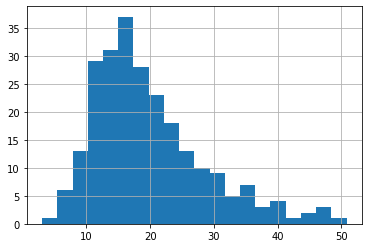

In [100]:
df['total_bill'].hist(bins=20)
plt.show()

In [103]:
avg_df=df.groupby('day')['total_bill'].mean()

In [104]:
avg_df

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

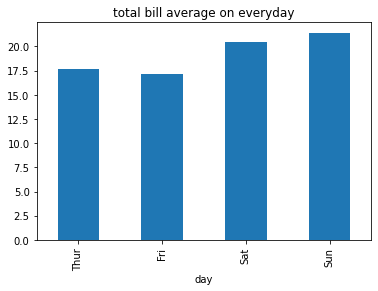

In [108]:
# bar plot
avg_df.plot(kind='bar',
title='total bill average on everyday')
plt.show()

In [ ]:
#line plot and rotation line plot


<AxesSubplot:xlabel='tip'>

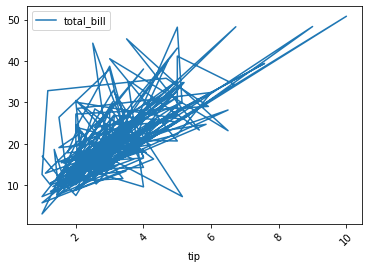

In [113]:
df.plot(x='tip',y='total_bill',kind='line',rot=45)

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

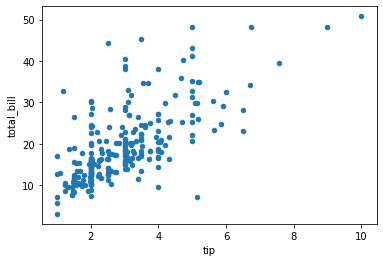

In [114]:
#scatter plot
df.plot(x='tip',y='total_bill',kind='scatter')

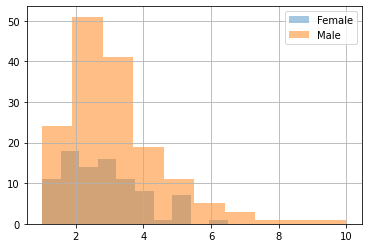

In [123]:
#layring plot
#ading lenged
#transparency
df[df['sex']=='Female']['tip'].hist(alpha=0.4)
df[df['sex']=='Male']['tip'].hist(alpha=0.5)
plt.legend(['Female','Male'])
plt.show()

In [124]:
# dectectiong missing value
df.isna()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [125]:
# dectection any missing value
df.isna().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [126]:
# counting missing values
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:>

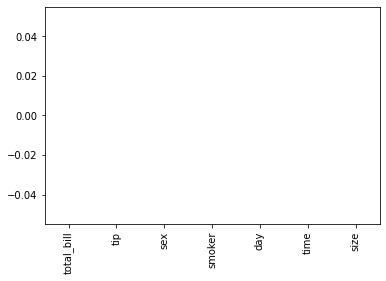

In [127]:
# ploting missing values
df.isna().sum().plot(kind='bar')

In [128]:
# removing missing values
df.dropna()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [130]:
# replacing missing values
#df.fillna(0)